In [1]:
from qa_qc_lib.kern.qa_qc_kern import QA_QC_kern
import numpy as np
import pandas as pd
import time

In [2]:
start_time = time.time()
df=pd.read_excel("data/DispersionFail(L-H).xlsx")
df=df[["Depth, m","Porosity"]].dropna()
x=df["Depth, m"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(file_path=path)
print(tests.get_method_description("test_general_dependency_checking"))
tests.test_general_dependency_checking(x,y)
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))


        Тест предназначен для оценки дисперсии входных данных.
        Он проводится по следующему алгоритму: изначально,
        используя статистические методы, детектируются и удаляются
        выбросные точки, затем полученное облако точек  аппроксимируется
        и считается коэффициент детерминации R2. Если его значение больше
        0.7, то тест считается пройденным. Если значение меньше 0.7, то
        точки сортируются по удаленности от линии тренда, и запускается
        цикл, за одну итерацию которого удаляется самая отдаленная от
        линии аппроксимации точка, и считается R2, если значение больше
        0.7, и удалено менее 10% точек, то тест пройден, иначе - нет.

            Args:
                x (array[int/float]): массив с данными для проверки
                y (array[int/float]): массив с данными для проверки

            Returns:
                dict[str, bool | str | Any] | dict[str, bool | str | Any]: словарь с результатом теста, значением
                

In [3]:
start_time = time.time()
df=pd.read_excel("data/DispersionOK(L-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(file_path=path)
print(tests.get_method_description("test_general_dependency_checking"))
tests.test_general_dependency_checking(x,y)
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))


        Тест предназначен для оценки дисперсии входных данных.
        Он проводится по следующему алгоритму: изначально,
        используя статистические методы, детектируются и удаляются
        выбросные точки, затем полученное облако точек  аппроксимируется
        и считается коэффициент детерминации R2. Если его значение больше
        0.7, то тест считается пройденным. Если значение меньше 0.7, то
        точки сортируются по удаленности от линии тренда, и запускается
        цикл, за одну итерацию которого удаляется самая отдаленная от
        линии аппроксимации точка, и считается R2, если значение больше
        0.7, и удалено менее 10% точек, то тест пройден, иначе - нет.

            Args:
                x (array[int/float]): массив с данными для проверки
                y (array[int/float]): массив с данными для проверки

            Returns:
                dict[str, bool | str | Any] | dict[str, bool | str | Any]: словарь с результатом теста, значением
                


        Тест предназначен для оценки соответствия типовой
        для данного кроссплота и полученной аппроксимации.
        В данном случае зависимость линейная по функции
        y=a*x+b, при этом a<0

            Args:
                self.sw_residual (array[int/float]): массив с данными коэффициент остаточной водонасыщенности для проверки
                self.kp (array[int/float]): массив с данными коэффициент пористости для проверки

            Returns:
                image: визуализация кроссплота
                dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
                file: запись результата теста для сохранения состояния
        


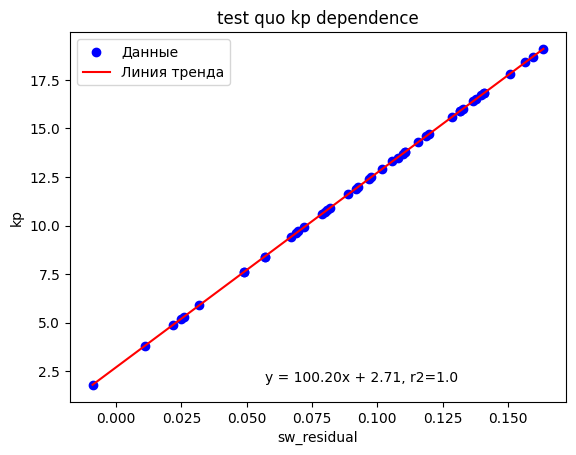

--- 0.5172317028045654 seconds ---


In [4]:
start_time = time.time()
df=pd.read_excel("data/Swc-PoroFail(N-H).xlsx")
df=df[["Sw","Porosity"]].dropna()
x=df["Sw"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw_residual=x,kp=y,file_path=path)
print(tests.get_method_description("test_quo_kp_dependence"))
tests.start_tests(["test_quo_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

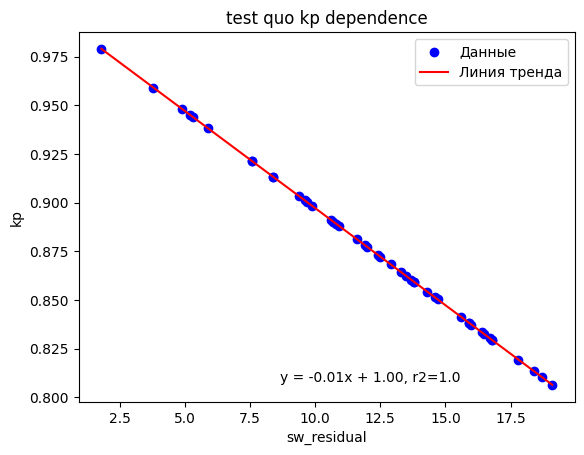

--- 0.3645801544189453 seconds ---


In [5]:
start_time = time.time()
df=pd.read_excel("data/Swc-PoroOK(N-H).xlsx")
df=df[["Sw","Porosity"]].dropna()
y=df["Sw"].dropna().to_numpy()
x=df["Porosity"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw_residual=x, kp=y,file_path=path)
tests.get_method_description("test_quo_kp_dependence")
tests.start_tests(["test_quo_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

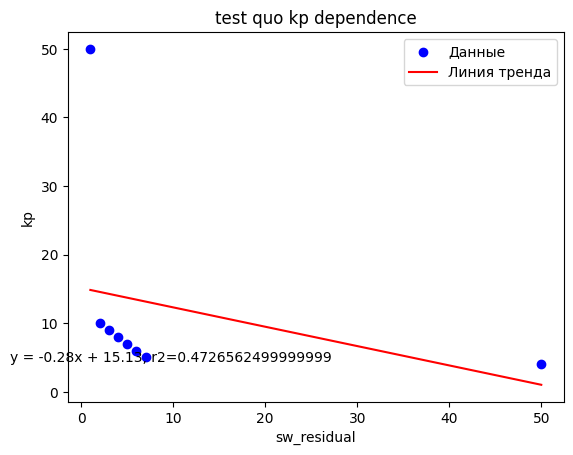

--- 0.34008216857910156 seconds ---


In [6]:
start_time = time.time()
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([50,10,9,8,7,6,5,4])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kp=y,file_path=path)
tests.get_method_description("test_quo_kp_dependence")
tests.start_tests(["test_quo_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

45 45

        Тест предназначен для оценки соответствия типовой
        для данного кроссплота и полученной аппроксимации.
        В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

        Args:
            self.kp (array[int/float]): массив с данными коэффициента пористости для проверки
            self.density (array[int/float]): массив с данными плотности для проверки

        Returns:
            image: визуализация кроссплота
            dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
            file: запись результата теста для сохранения состояния
        


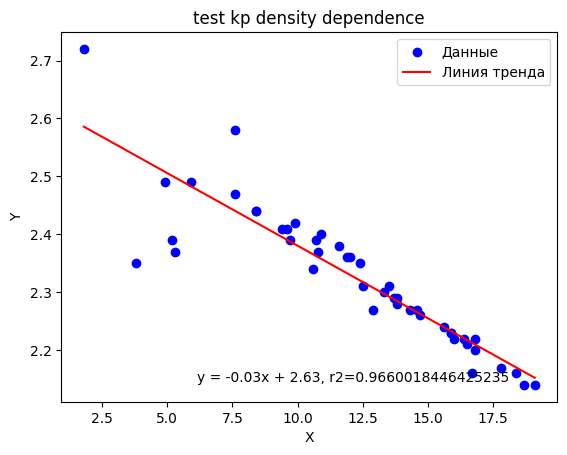

--- 0.36686038970947266 seconds ---


In [7]:
start_time = time.time()
df=pd.read_excel("data/Density-PoroOK(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
print(len(x), len(y))
path="data\\"
tests = QA_QC_kern(density=x, kp=y,file_path=path)
print(tests.get_method_description("test_kp_density_dependence"))
tests.start_tests(["test_kp_density_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))


        Тест предназначен для оценки соответствия типовой
        для данного кроссплота и полученной аппроксимации.
        В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

        Args:
            self.kp (array[int/float]): массив с данными коэффициента пористости для проверки
            self.density (array[int/float]): массив с данными плотности для проверки

        Returns:
            image: визуализация кроссплота
            dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
            file: запись результата теста для сохранения состояния
        


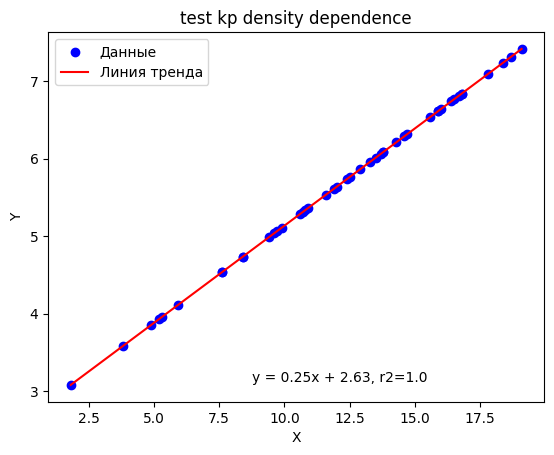

--- 0.3064234256744385 seconds ---


In [8]:
start_time = time.time()
df=pd.read_excel("data/Density-PoroFail(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(density=x, kp=y,file_path=path)
print(tests.get_method_description("test_kp_density_dependence"))
tests.start_tests(["test_kp_density_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

[0.01999999999999999] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.01999999999999999, 0.03000000000000001] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.01999999999999999, 0.03000000000000001, 0.040000000000000015] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.01999999999999999, 0.03000000000000001, 0.040000000000000015, 0.04999999999999999] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.01999999999999999, 0.03000000000000001, 0.040000000000000015, 0.04999999999999999, 0.059999999999999984] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.01999999999999999, 0.03000000000000001, 0.040000000000000015, 0.04999999999999999, 0.059999999999999984, 0.06999999999999998] [0.2 0.3 0.4 0.5 0.6 0.7 0.8] [0.8 0.7 0.6 0.5 0.4 0.3 0.2] [0.1 0.2 0.3 0.4 0.5 0.6 0.7]
[0.0199

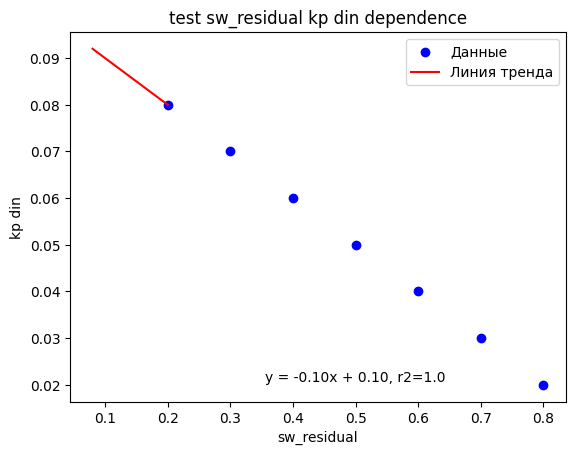

--- 0.32694077491760254 seconds ---


In [9]:
start_time = time.time()
# df=pd.read_excel("data/file.xlsx")
x=np.array([0.8,0.7,0.6,0.5,0.4,0.3,0.2])
y=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
z=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
path="data\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,kno=z,file_path=path)
print(tests.get_method_description("test_sw_residual_kp_din_dependence"))
tests.start_tests(["test_sw_residual_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [10]:
start_time = time.time()
# df=pd.read_excel("data/file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_sw_residual_kp_din_dependence"))
tests.start_tests(["test_sw_residual_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Exception ignored in: <function QA_QC_kern.__del__ at 0x00000214A02020E0>
Traceback (most recent call last):
  File "C:\Users\nikit\PycharmProjects\QA_QC_proj\qa_qc_lib\kern\qa_qc_kern.py", line 82, in __del__
    self.file.close()
AttributeError: 'QA_QC_kern' object has no attribute 'file'


TypeError: QA_QC_kern.__init__() got an unexpected keyword argument 'kp_din'

In [ ]:
start_time = time.time()
# df=pd.read_excel("data/file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
z=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(obplnas=x, minple=y,kp=z,file_path=path)
print(tests.get_method_description("test_obblnas_kp_dependence"))
tests.start_tests(["test_obblnas_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel("data/file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([50,10,9,8,7,6,5,4])
z=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(obplnas=x, minple=y,kp=z,file_path=path)
print(tests.get_method_description("test_obblnas_kp_dependence"))
tests.start_tests(["test_obblnas_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([8,7,6,5,4,3,2])
y=np.array([2,3,4,5,6,7,8])
path="data\\"
tests = QA_QC_kern(kp_ef=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_kp_ef_kpdin_dependence"))
tests.start_tests(["test_kp_ef_kpdin_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(kp_ef=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_kp_ef_kpdin_dependence"))
tests.start_tests(["test_kp_ef_kpdin_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(kp_ef=x, kp=y,file_path=path)
print(tests.get_method_description("test_kp_ef_kp_dependence"))
tests.start_tests(["test_kp_ef_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([8,7,6,5,4,3,2])
y=np.array([-5,-3,-4,-5,-6,-7,-8])
path="data\\"
tests = QA_QC_kern(kp_ef=x, kp=y,file_path=path)
print(tests.get_method_description("test_kp_ef_kp_dependence"))
tests.start_tests(["test_kp_ef_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([8,7,6,5,4,3,2])
y=np.array([-5,-3,-4,-5,-6,-7,-8])
path="data\\"
tests = QA_QC_kern(kp=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_kp_kp_din_dependence"))
tests.start_tests(["test_kp_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(kp=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_kp_kp_din_dependence"))
tests.start_tests(["test_kp_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6])
y=np.array([1,1,1,1,1,1])
path="data\\"
tests = QA_QC_kern(kpr=x, kp=y,file_path=path)
print(tests.get_method_description("test_dependence_kpr_kp"))
tests.start_tests(["test_dependence_kpr_kp"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(kpr=x, kp=y,file_path=path)
print(tests.get_method_description("test_dependence_kpr_kp"))
tests.start_tests(["test_dependence_kpr_kp"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6])
y=np.array([1,1,1,1,1,1])
path="data\\"
tests = QA_QC_kern(kpr=x, kp_din=y,file_path=path)
print(tests.get_method_description("test_dependence_kpr_kp_din"))
tests.start_tests(["test_dependence_kpr_kp_din"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7, 50])
y = np.array([1, 2, 3, 4, 5, 6, 7, 50])
path="data\\"
tests = QA_QC_kern(kpr=x, kp_din=y, file_path=path)
print(tests.get_method_description("test_dependence_kpr_kp_din"))
tests.start_tests(["test_dependence_kpr_kp_din"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7, 50])
y = np.array([1, 2, 3, 4, 5, 6, 7, 50])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kpr=y, file_path=path)
print(tests.get_method_description("test_dependence_sw_residual_kpr"))
tests.start_tests(["test_dependence_sw_residual_kpr"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 9, 8, 7, 6, 5, 4, 3])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kpr=y, file_path=path)
print(tests.get_method_description("test_dependence_sw_residual_kpr"))
tests.start_tests(["test_dependence_sw_residual_kpr"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 9, 8, 7, 6, 5, 4, 3])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
path="data\\"
tests = QA_QC_kern(rn=x, kv=y, file_path=path)
print(tests.get_method_description("test_rn_kv_dependencies"))
tests.start_tests(["test_rn_kv_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7,8, 12,7,6,5,4,3,2])
y = np.array([1, 2, 3, 4, 5, 6, 7,8, 12,91,113,10,5,4,3])
path="data\\"
tests = QA_QC_kern(rn=x, kv=y, file_path=path)
print(tests.get_method_description("test_rn_kv_dependencies"))
tests.start_tests(["test_rn_kv_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.0, 1.0, 0.5, 0.3, 0.2])
path="data\\"
tests = QA_QC_kern(rp=x, kp=y, file_path=path)
print(tests.get_method_description("test_rp_kp_dependencies"))
tests.start_tests(["test_rp_kp_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="data\\"
tests = QA_QC_kern(rp=x, kp=y, file_path=path)
print(tests.get_method_description("test_rp_kp_dependencies"))
tests.start_tests(["test_rp_kp_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="data\\"
tests = QA_QC_kern(roof=x, sole=y, file_path=path)
print(tests.get_method_description("test_coring_depths_first"))
tests.start_tests(["test_coring_depths_first"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
path="data\\"
tests = QA_QC_kern(roof=x, sole=y, file_path=path)
print(tests.get_method_description("test_coring_depths_first"))
tests.start_tests(["test_coring_depths_first"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 11, 12, 13, 14])
y = np.array([2, 3, 4, 5, 6])
z= np.array([7, 6, 5, 4, 3])
path="data\\"
tests = QA_QC_kern(sole=x, roof=y,takeout=z, file_path=path)
print(tests.get_method_description("test_coring_depths_second"))
tests.start_tests(["test_coring_depths_second"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 11, 12, 13, 14])
y = np.array([2, 3, 4, 5, 6])
z= np.array([17, 16, 15, 14, 13])
path="data\\"
tests = QA_QC_kern(roof=x, sole=y,takeout=z, file_path=path)
print(tests.get_method_description("test_coring_depths_second"))
tests.start_tests(["test_coring_depths_second"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([[10,13], [1,11]])
y = np.array([1,10])
z=np.array([33,100])
path="data\\"
tests = QA_QC_kern(intervals=x, percentage=z, outreach_in_meters=y, file_path=path)
print(tests.get_method_description("test_coring_depths_third"))
tests.start_tests(["test_coring_depths_third"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([[10,13], [1,11]])
y = np.array([1,10])
z=np.array([33.333,100.0])
path="data\\"
tests = QA_QC_kern(intervals=x, percentage=z, outreach_in_meters=y, file_path=path)
print(tests.get_method_description("test_coring_depths_third"))
tests.start_tests(["test_coring_depths_third"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="data\\"
tests = QA_QC_kern(sampling_depth=x, core_sampling=y, file_path=path)
print(tests.get_method_description("test_coring_depths_four"))
tests.start_tests(["test_coring_depths_four"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 1.0, 2.0])
path="data\\"
tests = QA_QC_kern(sampling_depth=x, core_sampling=y, file_path=path)
print(tests.get_method_description("test_coring_depths_four"))
tests.start_tests(["test_coring_depths_four"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array(["Скол", np.nan, np.nan, np.nan, "Трещина"])
path="data\\"
tests = QA_QC_kern(note=x,file_path=path)
print(tests.get_method_description("test_table_notes"))
tests.start_tests(["test_table_notes"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([np.nan, np.nan, np.nan])
path="data\\"
tests = QA_QC_kern(note=x, file_path=path)
print(tests.get_method_description("test_table_notes"))
tests.start_tests(["test_table_notes"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3])
y=np.array([1,2,3])
a=np.array([1,2,3])
b=np.array([1,2,3])
c=np.array([1,2,3])
v=np.array([1,2,3])
n=np.array([1,2,3])
path="data\\"
tests = QA_QC_kern(kpr=x, kp=y,rp=a,sw_residual=b,density=c,rn=v,kv=n, file_path=path)
print(tests.get_method_description("test_data_tampering"))
tests.start_tests(["test_data_tampering"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3])
y=np.array([4,5,6])
a=np.array([7,8,9])
b=np.array([10,11,12])
c=np.array([13,14,15])
v=np.array([16,17,18])
n=np.array([19,20,21])
path="data\\"
tests = QA_QC_kern(kpr=x, kp=y,rp=a,sw_residual=b,density=c,rn=v,kv=n, file_path=path)
print(tests.get_method_description("test_data_tampering"))
tests.start_tests(["test_data_tampering"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([0.7])
y=np.array([0.2])
a=np.array([0.1])
b=np.array([2.0])
f=np.array([0.56])
r=np.array([0.49])
t=np.array([2.7])
path="data\\"
tests = QA_QC_kern(kp=x, sw_residual=y,kno=a,pas=b,kp_ef=f, kp_din=r,pmu=t,file_path=path)
print(tests.get_method_description("test_estimated_values_in_core_data"))
tests.start_tests(["test_estimated_values_in_core_data"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([5])
y=np.array([52])
a=np.array([11])
b=np.array([2.0])
f=np.array([0.56])
r=np.array([0.49])
t=np.array([2.7])
path="data\\"
tests = QA_QC_kern(kp=x, sw_residual=y,kno=a,pas=b,kp_ef=f, kp_din=r,pmu=t,file_path=path)
print(tests.get_method_description("test_estimated_values_in_core_data"))
tests.start_tests(["test_estimated_values_in_core_data"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 1.0, 2.0])
path="data\\"
tests = QA_QC_kern(kp_plast=x, kp_pov=y, file_path=path)
print(tests.get_method_description("test_kp_in_surface_and_reservoir_conditions"))
tests.start_tests(["test_kp_in_surface_and_reservoir_conditions"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([5, 6, 7, 5, 6])
y = np.array([1, 2, 3, 4, 5])
path="data\\"
tests = QA_QC_kern(kp_plast=x, kp_pov=y, file_path=path)
print(tests.get_method_description("test_kp_in_surface_and_reservoir_conditions"))
tests.start_tests(["test_kp_in_surface_and_reservoir_conditions"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
y = np.array([0.2, 0.1, 0.2, 0.3, 0.3])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
print(tests.get_method_description("test_quo_and_qno"))
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
y = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
path="data\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
print(tests.get_method_description("test_quo_and_qno"))
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
path="data\\"
tests = QA_QC_kern(parallel=None,parallel_density=None,parallel_carbonate=None,parallel_porosity=None,perpendicular=None,perpendicular_density=None,perpendicular_carbonate=None,perpendicular_porosity=None, file_path=path)
print(tests.get_method_description("test_correctness_of_p_sk_kp"))
tests.start_tests(["test_correctness_of_p_sk_kp"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.start_tests(["test_open_porosity"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="data\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.start_tests(["test_open_porosity"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(poroHe=arr,file_path=path)
tests.start_tests(["test_porosity_HE"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="data\\"
tests = QA_QC_kern(poroHe=arr,file_path=path)
tests.start_tests(["test_porosity_HE"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(poroTBU=arr,file_path=path)
tests.start_tests(["test_porosity_TBU"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="data\\"
tests = QA_QC_kern(poroTBU=arr,file_path=path)
tests.start_tests(["test_porosity_TBU"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(porosity_kerosine=arr,file_path=path)
tests.start_tests(["test_porosity_kerosine"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="data\\"
tests = QA_QC_kern(porosity_kerosine=arr,file_path=path)
tests.start_tests(["test_porosity_kerosine"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="data\\"
tests = QA_QC_kern(porosity_effective=arr,file_path=path)
tests.start_tests(["test_porosity_effective"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="data\\"
tests = QA_QC_kern(porosity_effective=arr,file_path=path)
tests.start_tests(["test_porosity_effective"])
tests.generate_test_report()

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwFail(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw=arr,file_path=path)
tests.start_tests(["test_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwOK(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw=arr,file_path=path, file_name="SwOK(N).xlsx")
tests.start_tests(["test_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwFail(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw_residual=arr,file_path=path)
tests.start_tests(["test_residual_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwOK(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(sw_residual=arr,file_path=path, file_name="SwOK(N).xlsx")
tests.start_tests(["test_residual_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityKlinkenFail(R).xlsx")
arr=df["PermKlinken"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(klickenberg_permeability=arr,file_path=path)
tests.start_tests(["test_klickenberg_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityKlinkenOK(R).xlsx")
arr=df["PermKlinken"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(klickenberg_permeability=arr,file_path=path)
tests.start_tests(["test_klickenberg_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityParallelFail(L).xlsx")
arr=df["Permeabilty, mkm2"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(parallel_permeability=arr,file_path=path)
tests.start_tests(["test_parallel_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityParallelOK(L).xlsx")
arr=df["Permeabilty, mkm2"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(parallel_permeability=arr,file_path=path)
tests.start_tests(["test_parallel_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityEffOK(R).xlsx")
arr=df["PermEFF"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(effective_permeability=arr,file_path=path)
tests.start_tests(["test_effective_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityEffFail(R).xlsx")
arr=df["PermEFF"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(effective_permeability=arr,file_path=path)
tests.start_tests(["test_effective_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityWOK(R).xlsx")
arr=df["PermW"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityWFail(R).xlsx")
arr=df["PermW"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/NumbersFail.xlsx")
arr=df["dT, km/s"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/NumbersOK.xlsx")
arr=df["dT, km/s"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/MonotonousOK(F).xlsx")
arr=df["Depth, m"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(md=arr,file_path=path)
tests.start_tests(["test_monotony"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/MonotonousFail(F).xlsx")
arr=df["Depth, m"].dropna().to_numpy()
path="data\\"
tests = QA_QC_kern(md=arr,file_path=path)
tests.start_tests(["test_monotony"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))